In [0]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, RepeatedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##Voting Ensemble for Classification

   **For Classification task, there are two approaches to the majority vote prediction; they are hard voting and soft voting.**

   Hard voting involves summing the predictions for each class label and predicting the class label with the most votes. Soft voting involves summing the predicted probabilities (or probability-like scores) for each class label and predicting the class label with the largest probability.

   1. **Hard Voting**. Predict the class with the largest sum of votes from models
   2. **Soft Voting**. Predict the class with the **largest summed probability** from models.

###Utility Functions

In [0]:
def get_dataset():
    X,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X,y

In [0]:
def get_voting(vote):
    models = list()
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    ensemble = VotingClassifier(models,voting=vote)
    return ensemble

In [0]:
def final_model(vote):
    model = dict()
    model['knn1'] = KNeighborsClassifier(n_neighbors=1)
    model['knn3'] = KNeighborsClassifier(n_neighbors=3)
    model['knn5'] = KNeighborsClassifier(n_neighbors=5)
    model['knn7'] = KNeighborsClassifier(n_neighbors=7)
    model['knn9'] = KNeighborsClassifier(n_neighbors=9)
    model[vote+'-voting'] = get_voting(vote)
    return model

In [0]:
def evaluate(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    score = cross_val_score(model,X, y, cv = cv, n_jobs=1, scoring='accuracy', error_score='raise')
    return score

###Data Loading And preparation

In [0]:
X,y = get_dataset()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Data Visualization

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(X)

In [23]:
x_df = pd.DataFrame(x)
x_df.head()

,0,1
0,5.351991,-7.663890
1,14.432757,-0.042869
2,1.482077,8.314692
3,4.818884,-3.339531
4,2.359581,-7.907423


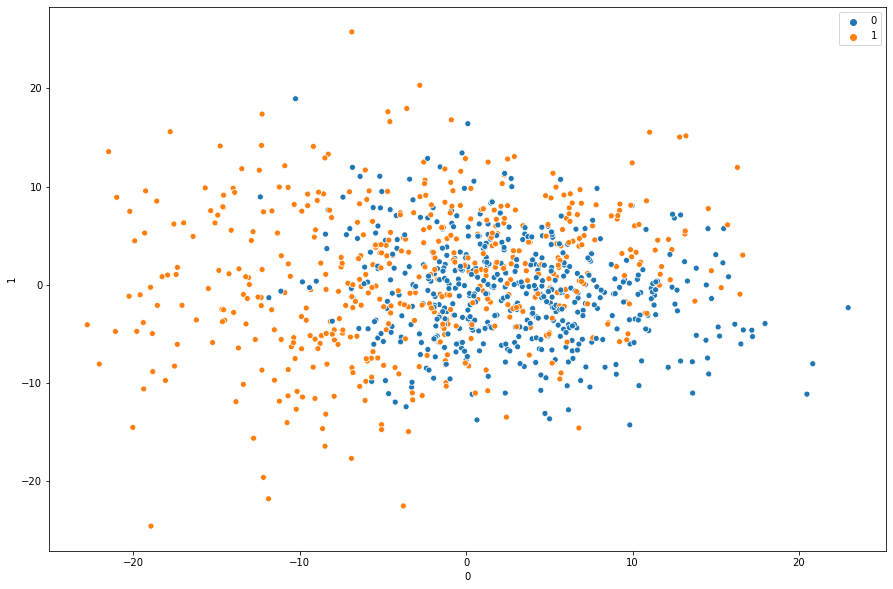

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x_df[0], x_df[1], hue=y)
plt.show()

###Hard Voting Ensemble for Classification

In [45]:
voting_type = 'hard'
models = final_model(voting_type)
names, res = list(), list()

for (name, model) in models.items():
    score = evaluate(model, x_train, y_train)
    res.append(score)
    names.append(name)
    print('>>>%s %.3f (%.3f)' % (name, score.mean(), score.std()))

>>>knn1 0.889 (0.034)
>>>knn3 0.921 (0.029)
>>>knn5 0.920 (0.029)
>>>knn7 0.919 (0.034)
>>>knn9 0.926 (0.031)
>>>hard-voting 0.927 (0.031)


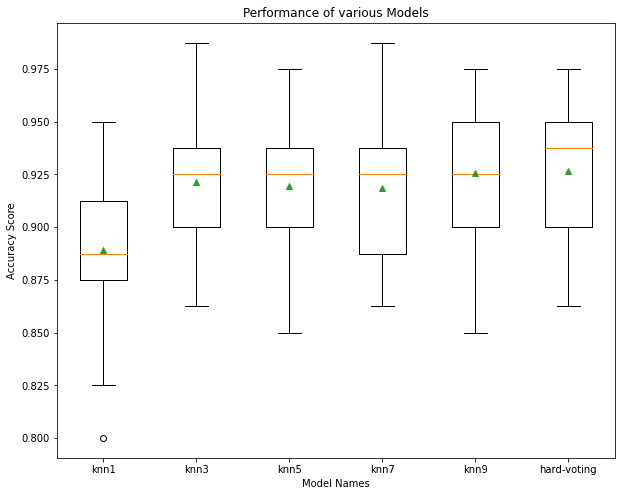

In [29]:
plt.figure(figsize=(10,8))
plt.boxplot(res, labels=names, showmeans=True)
plt.xlabel('Model Names')
plt.ylabel('Accuracy Score')
plt.title('Performance of various Models')
plt.show()

###Prediction using Ensemble models

In [0]:
model = get_voting()
model.fit(x_train, y_train)
model_pred = model.predict(x_test)

In [32]:
print("accuracy score : ", accuracy_score(y_test, model_pred))

accuracy score :  0.945


####Prediction with other models

In [33]:
models

{'hard-voting': VotingClassifier(estimators=[('knn1',
                               KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=1,
                                                    p=2, weights='uniform')),
                              ('knn3',
                               KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=3,
                                                    p=2, weights='uniform')),
                              (

In [39]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("accuracy score for %s : (%.3f) on predicted values" %(name, accuracy_score(y_test, model.predict(x_test))))

accuracy score for knn1 : (0.935) on predicted values
accuracy score for knn3 : (0.945) on predicted values
accuracy score for knn5 : (0.945) on predicted values
accuracy score for knn7 : (0.930) on predicted values
accuracy score for knn9 : (0.940) on predicted values
accuracy score for hard-voting : (0.945) on predicted values


###Soft Voting Classifier

In [0]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [0]:
def get_soft_voting():
    models = list()
    models.append(('svc1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svc2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svc3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svc4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svc5', SVC(probability=True, kernel='poly', degree=5)))
    ensemble = VotingClassifier(estimators = models, voting='soft')
    return ensemble

In [0]:
def get_models():
    models = dict()
    models['svc1'] = SVC(probability=True, kernel='poly', degree=1)
    models['svc2'] = SVC(probability=True, kernel='poly', degree=2)
    models['svc3'] = SVC(probability=True, kernel='poly', degree=3)
    models['svc4'] = SVC(probability=True, kernel='poly', degree=4)
    models['svc5'] = SVC(probability=True, kernel='poly', degree=5)
    models['soft-voting'] = get_soft_voting()
    return models

In [0]:
def soft_evaluate(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    score = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=1, error_score='raise')
    return score

In [0]:
sc_X = StandardScaler()
x = sc_X.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [0]:
models = get_models()

In [79]:
res, names = list(), list()

for name, model in models.items():
    names.append(name)
    score = soft_evaluate(model,x,y)
    res.append(score)
    print(">>> %s %.3f (%.3f)" % (name, score.mean(), score.std()))

>>> svc1 0.871 (0.036)
>>> svc2 0.888 (0.025)
>>> svc3 0.938 (0.027)
>>> svc4 0.894 (0.024)
>>> svc5 0.921 (0.025)
>>> soft-voting 0.959 (0.019)


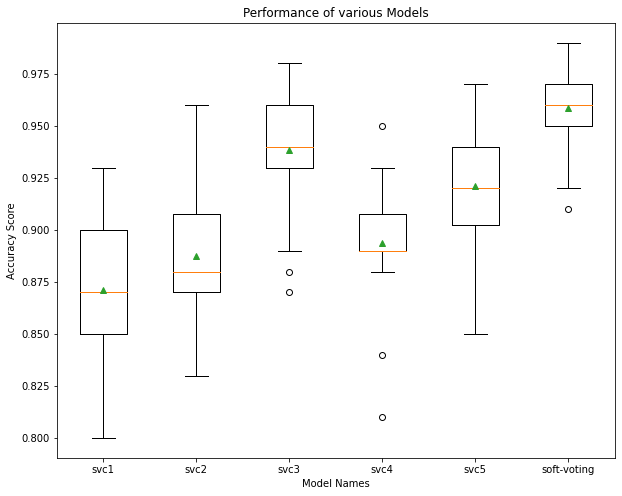

In [80]:
plt.figure(figsize=(10,8))
plt.boxplot(res, labels=names, showmeans=True)
plt.xlabel('Model Names')
plt.ylabel('Accuracy Score')
plt.title('Performance of various Models')
plt.show()

In [81]:
models

{'soft-voting': VotingClassifier(estimators=[('svc1',
                               SVC(C=1.0, break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_function_shape='ovr', degree=1,
                                   gamma='scale', kernel='poly', max_iter=-1,
                                   probability=True, random_state=None,
                                   shrinking=True, tol=0.001, verbose=False)),
                              ('svc2',
                               SVC(C=1.0, break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_f...
                                   probability=True, random_state=None,
                                   shrinking=True, tol=0.001, verbose=False)),
                              ('svc5',
                               SVC(C=1.0, break_ties=False, cache_size=200,
     

In [82]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("accuracy score for %s : (%.3f) on predicted values" %(name, accuracy_score(y_test, model.predict(x_test))))

accuracy score for svc1 : (0.880) on predicted values
accuracy score for svc2 : (0.835) on predicted values
accuracy score for svc3 : (0.920) on predicted values
accuracy score for svc4 : (0.855) on predicted values
accuracy score for svc5 : (0.905) on predicted values
accuracy score for soft-voting : (0.935) on predicted values


##Voting Ensemble for Regression

In [0]:
from sklearn.datasets import make_regression
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [0]:
def get_regression_dataset():
    X,y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)
    return X,y

In [0]:
def ensemble_model():
    models = list()
    models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
    models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
    models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
    models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
    models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
    # define the voting ensemble
    ensemble = VotingRegressor(estimators=models)
    return ensemble

In [0]:
def all_models():
    models = dict()
    models['cart1'] = DecisionTreeRegressor(max_depth=1)
    models['cart2'] = DecisionTreeRegressor(max_depth=2)
    models['cart3'] = DecisionTreeRegressor(max_depth=3)
    models['cart4'] = DecisionTreeRegressor(max_depth=4)
    models['cart5'] = DecisionTreeRegressor(max_depth=5)
    models['voting'] = ensemble_model()
    return models

In [0]:
def get_evaluated(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    score = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv= cv, n_jobs=1, error_score='raise')
    return score

In [0]:
X,y  = get_regression_dataset()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [109]:
models = all_models()
res, names = list(), list()

for name, model in models.items():
    names.append(name)
    score = get_evaluated(model,X,y)
    res.append(score)
    print(">>> %s %.3f (%.3f)" % (name, score.mean(), score.std()))

>>> cart1 -176.556 (11.680)
>>> cart2 -170.902 (11.044)
>>> cart3 -163.456 (10.426)
>>> cart4 -157.211 (9.546)
>>> cart5 -151.715 (10.642)
>>> voting -153.636 (9.538)


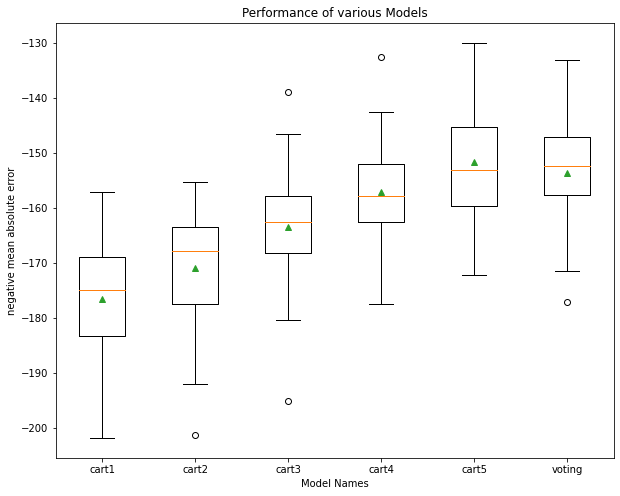

In [110]:
plt.figure(figsize=(10,8))
plt.boxplot(res, labels=names, showmeans=True)
plt.xlabel('Model Names')
plt.ylabel('negative mean absolute error')
plt.title('Performance of various Models')
plt.show()

In [111]:
models

{'cart1': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'cart2': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'cart3': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impur

In [113]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("RMSE score for %s : (%.3f) on predicted values" %(name, np.sqrt(mean_squared_error(y_test, model.predict(x_test)))))

RMSE score for cart1 : (219.233) on predicted values
RMSE score for cart2 : (211.741) on predicted values
RMSE score for cart3 : (199.711) on predicted values
RMSE score for cart4 : (186.982) on predicted values
RMSE score for cart5 : (187.322) on predicted values
RMSE score for voting : (189.633) on predicted values


###Ensembling Model for Regression using different ML Models

In [0]:
from sklearn.pipeline import make_pipeline

In [0]:
models = list()
models.append(('linear-reg', LinearRegression(normalize=True)))
models.append(('RandomForestRegressor', make_pipeline(StandardScaler(), RandomForestRegressor())))
models.append(('DecisionTreeRegressor', make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=4))))

ensemble_model = VotingRegressor(estimators=models)

In [121]:
score = get_evaluated(ensemble_model, x_train, y_train)
print(">>> %s %.3f (%.3f)" % (name, score.mean(), score.std()))

>>> voting -84.709 (6.916)


In [0]:
ensemble_model.fit(x_train, y_train)
y_pred = ensemble_model.predict(x_test)

In [125]:
print("RMSE score for %s : (%.3f) on predicted values" %(name, np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE score for voting : (102.107) on predicted values


So, we can see the use of ensembling of models